In [28]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import twitter_samples, stopwords
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk import FreqDist, classify, NaiveBayesClassifier
import re,string,random
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline

In [43]:
def remove_noise(tweet_tokens, stop_words = ()):
    
    cleaned_tokens = []
    
    for token, tag in pos_tag(tweet_tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token) #remove URL's
        token = re.sub("(@[A-Za-z0-9_]+)","", token) # remove twitter handles
        
        if tag.startswith('NN'):
            pos = 'n' #noun
        elif tag.startswith('VB'):
            pos = 'v' #verb
        else:
            pos = 'a' #adj
            
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token, pos)
        
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower()) # remove punctiation 
    return cleaned_tokens

# word density
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token
        
# converting tokens to a dictionary
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

In [26]:
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

stop_words = stopwords.words('english')

positive_tweet_tokens = twitter_samples.tokenized('positive_tweets.json')
negative_tweet_tokens = twitter_samples.tokenized('negative_tweets.json')

# print(positive_tweet_tokens)
print(pos_tag(positive_tweet_tokens[0]))

[('#FollowFriday', 'JJ'), ('@France_Inte', 'NNP'), ('@PKuchly57', 'NNP'), ('@Milipol_Paris', 'NNP'), ('for', 'IN'), ('being', 'VBG'), ('top', 'JJ'), ('engaged', 'VBN'), ('members', 'NNS'), ('in', 'IN'), ('my', 'PRP$'), ('community', 'NN'), ('this', 'DT'), ('week', 'NN'), (':)', 'NN')]


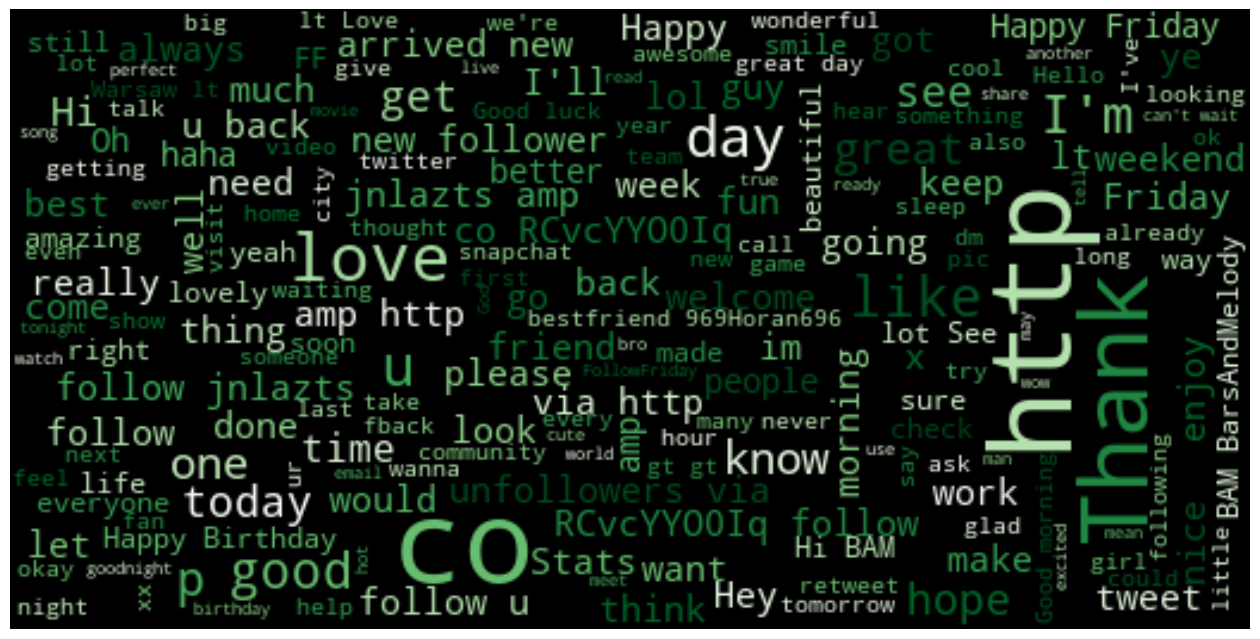

In [34]:
#wordcloud positive (before cleaning out noise)
positive_tweets_string = (' ').join(positive_tweets)

positive_tweets_cloud = WordCloud(width = 520, height = 260, stopwords = stop_words, max_font_size = 50,
                                  background_color = 'black', colormap = 'Greens').generate(positive_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(positive_tweets_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

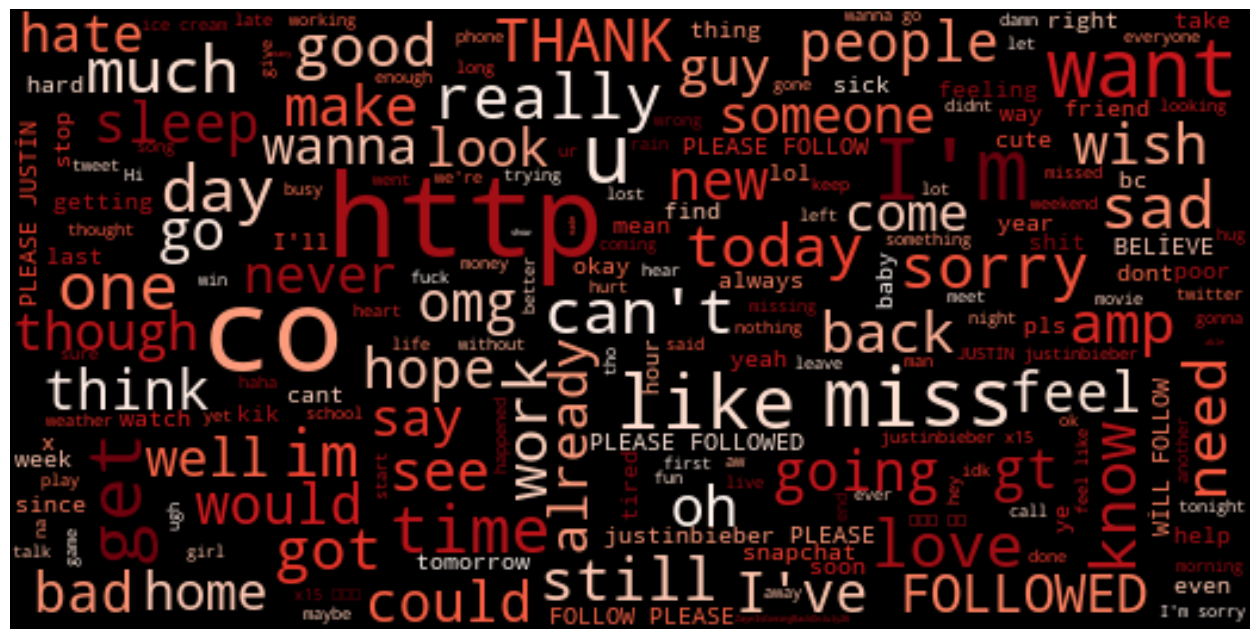

In [33]:
#wordcloud negative (before cleaning out noise)
negative_tweets_string = (' ').join(negative_tweets)

negative_tweets_cloud = WordCloud(width = 520, height = 260, stopwords = stop_words, max_font_size = 50,
                                  background_color = 'black', colormap = 'Reds').generate(negative_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(negative_tweets_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [54]:
positive_cleaned_tokens_list = []
negative_cleaned_tokens_list = []

for tokens in positive_tweet_tokens:
    positive_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
                                                
for tokens in negative_tweet_tokens:
    negative_cleaned_tokens_list.append(remove_noise(tokens, stop_words))
                                         
#print(positive_cleaned_tokens_list)

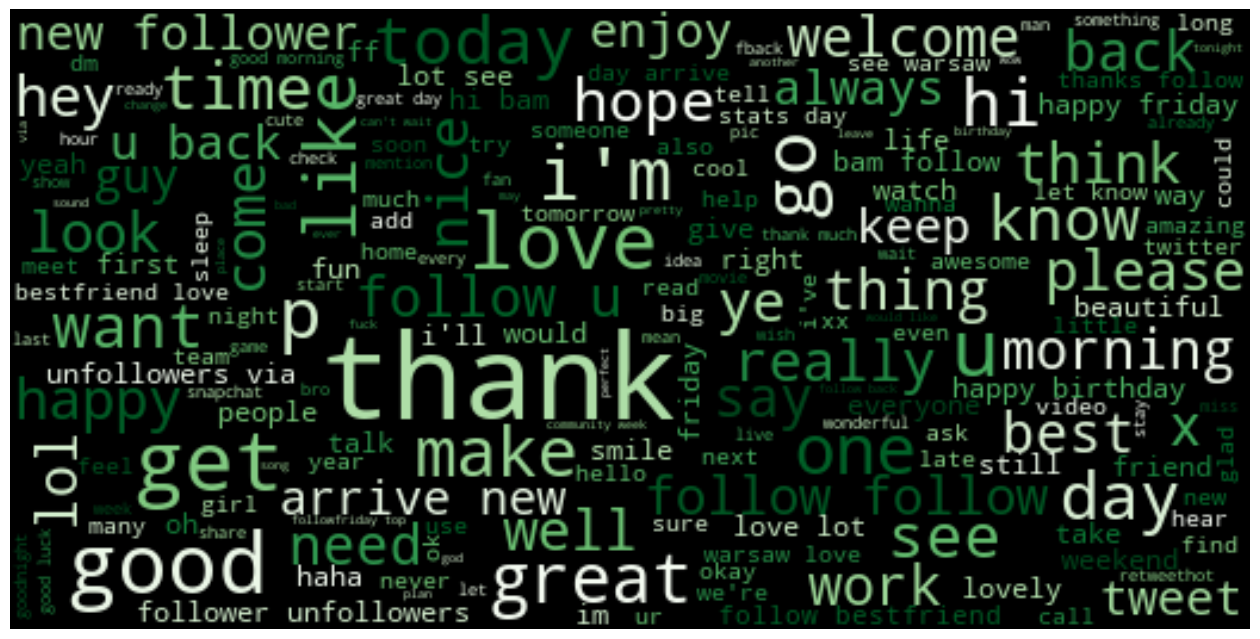

In [60]:
#wordcloud positive (post cleaning out noise)
flattened_list = [item for sublist in positive_cleaned_tokens_list for item in sublist]
positive_tweets_string = ' '.join(flattened_list)

positive_tweets_cloud = WordCloud(width = 520, height = 260, stopwords = stop_words, max_font_size = 50,
                                  background_color = 'black', colormap = 'Greens').generate(positive_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(positive_tweets_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

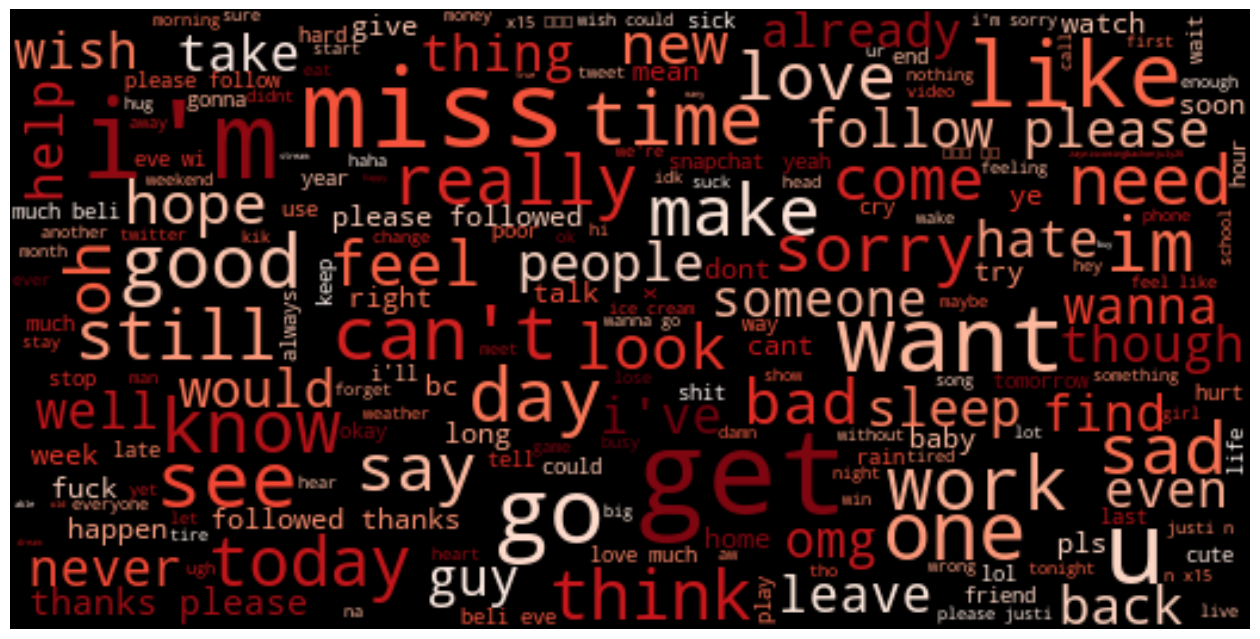

In [80]:
#wordcloud negative (post cleaning out noise)
flattened_list = [item for sublist in negative_cleaned_tokens_list for item in sublist]
negative_tweets_string = ' '.join(flattened_list)

positive_tweets_cloud = WordCloud(width = 520, height = 260, stopwords = stop_words, max_font_size = 50,
                                  background_color = 'black', colormap = 'Reds').generate(negative_tweets_string)
plt.figure(figsize=(16,10))
plt.imshow(positive_tweets_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [64]:
all_pos_words = get_all_words(positive_cleaned_tokens_list)
freq_dist_pos = FreqDist(all_pos_words)

print(freq_dist_pos)
print(freq_dist_pos.most_common(10))

<FreqDist with 7429 samples and 34497 outcomes>
[(':)', 3691), (':-)', 701), (':d', 658), ('thanks', 388), ('follow', 357), ('love', 333), ('...', 290), ('good', 283), ('get', 263), ('thank', 253)]


In [65]:
all_pos_words = get_all_words(negative_cleaned_tokens_list)
freq_dist_pos = FreqDist(all_pos_words)

print(freq_dist_pos)
print(freq_dist_pos.most_common(10))

<FreqDist with 7023 samples and 33751 outcomes>
[(':(', 4585), (':-(', 501), ("i'm", 343), ('...', 332), ('get', 325), ('miss', 291), ('go', 275), ('please', 275), ('want', 246), ('like', 218)]


In [67]:
positive_tokens_for_model = get_tweets_for_model(positive_cleaned_tokens_list)
negative_tokens_for_model = get_tweets_for_model(negative_cleaned_tokens_list)

positive_dataset = [(tweet_dict, "Positive")
 for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
 for tweet_dict in negative_tokens_for_model]

#print(positive_dataset)
#print(negative_dataset)

In [68]:
dataset = positive_dataset + negative_dataset
random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

classifier = NaiveBayesClassifier.train(train_data)

In [71]:
print("Accuracy is:", classify.accuracy(classifier, test_data))

Accuracy is: 0.9943333333333333


note: accuracy is high because the dataset is very good. In real life with raw data, accuracy will not be this high

In [72]:
print(classifier.show_most_informative_features(10))

Most Informative Features
                      :( = True           Negati : Positi =   2087.3 : 1.0
                      :) = True           Positi : Negati =    994.1 : 1.0
                     bam = True           Positi : Negati =     23.9 : 1.0
                follower = True           Positi : Negati =     21.4 : 1.0
                     sad = True           Negati : Positi =     19.4 : 1.0
                     x15 = True           Negati : Positi =     17.3 : 1.0
                 welcome = True           Positi : Negati =     15.8 : 1.0
               community = True           Positi : Negati =     14.7 : 1.0
                  arrive = True           Positi : Negati =     13.3 : 1.0
                     ugh = True           Negati : Positi =     12.6 : 1.0
None


In [76]:
# test 1 with your own tweet

custom_tweet = "I hate when I'm stuck in traffic. It's the worst, especially because I want to hurry up and get home"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

I hate when I'm stuck in traffic. It's the worst, especially because I want to hurry up and get home
Negative


In [77]:
# test 2 with your own tweet

custom_tweet = "Shrek is the best movie in the world"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Shrek is the best movie in the world
Positive


In [78]:
# test 3 with your own tweet

custom_tweet = "I hope the Barbie movie makes 1 billion dollars"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

I hope the Barbie movie makes 1 billion dollars
Positive


In [83]:
# test 34 with your own tweet

custom_tweet = "Justin Bieber"
custom_tokens = remove_noise(word_tokenize(custom_tweet))
print(custom_tweet)
print(classifier.classify(dict([token, True] for token in custom_tokens)))

Justin Bieber
Positive
